In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r'..\Datasets\Misc\tennis.csv')
df.drop('Day', axis=1, inplace=True)


In [3]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

C:\Users\soham\AppData\Local\Temp\ipykernel_3312\3977498353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Play_Tennis', palette='Set2')


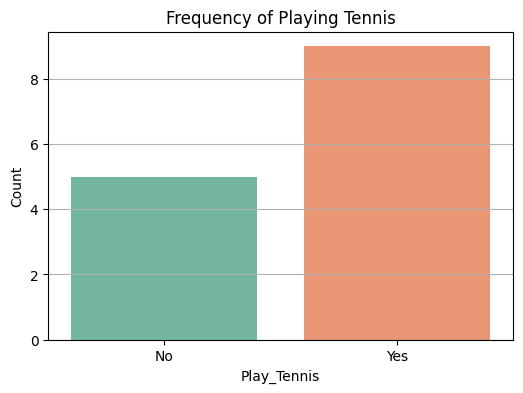

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Play_Tennis', palette='Set2')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Frequency of Playing Tennis')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


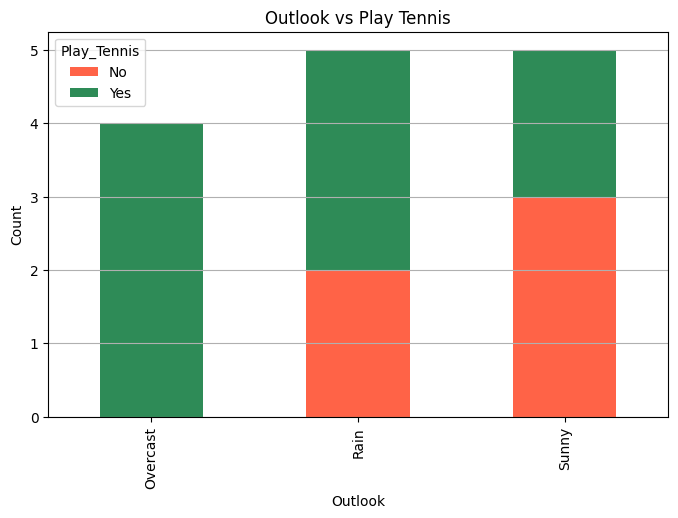

In [ ]:

df_viz = df.copy()
df_viz['Outlook'] = label_encoders['Outlook'].inverse_transform(df_viz['Outlook'])
df_viz['Play_Tennis'] = label_encoders['Play_Tennis'].inverse_transform(df_viz['Play_Tennis'])

outlook_vs_play = pd.crosstab(df_viz['Outlook'], df_viz['Play_Tennis'])

outlook_vs_play.plot(kind='bar', stacked=True, figsize=(8,5), color=['tomato', 'seagreen'])
plt.title('Outlook vs Play Tennis')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


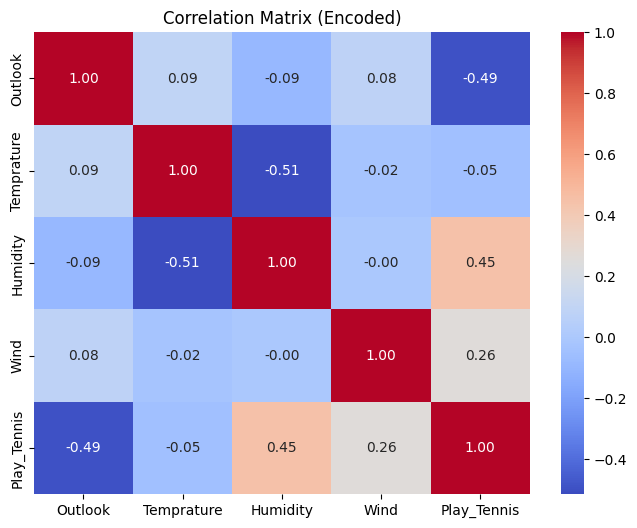

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Encoded)')
plt.show()
